In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [3]:
installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')

## **Analisis inicial**

In [4]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [5]:
len(installs)

3412

In [6]:
installs.isnull().sum()
# click_hash, device_brand, user_agent (1/2 nulls), event_uuid, kind, wifi (1/2 nulls), trans_id son casi todos Null #

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [7]:
installs['attributed'].value_counts()
# Todos los valores son False, no aporta informacion relevante #

False    3412
Name: attributed, dtype: int64

## 1 - Cantitad de installs por tipo

In [8]:
installs.kind.unique()

array([nan, 'Open', 'open', 'registration', 'app_open',
       'EVENT_LISTINGVIEW_FLIGHT', 'EVENT_Homepage', 'EVENT_OPEN_APP',
       'af_app_opened', 'deeplink', 'EVENT_PROMO', 'EVENT_HOMEPAGE',
       'af_list_view', 'install', 'journey first drop off',
       'reattribution', 'journey reserved', 'journey drop off',
       'account_summary_first_step', 'login_success',
       'payment method add'], dtype=object)

In [9]:
kinds = installs.groupby('kind').agg({'kind':'count'})

In [10]:
kinds = kinds.rename(index=str, columns={"kind":"kind_count","index":"kind"})
kinds = kinds.sort_values('kind_count', ascending=False)

Me quedo unicamente con los tipos de instalacion que sucedieron mas de 10 veces

In [11]:
kinds = kinds.loc[(kinds['kind_count'] > 10), ['kind_count']]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


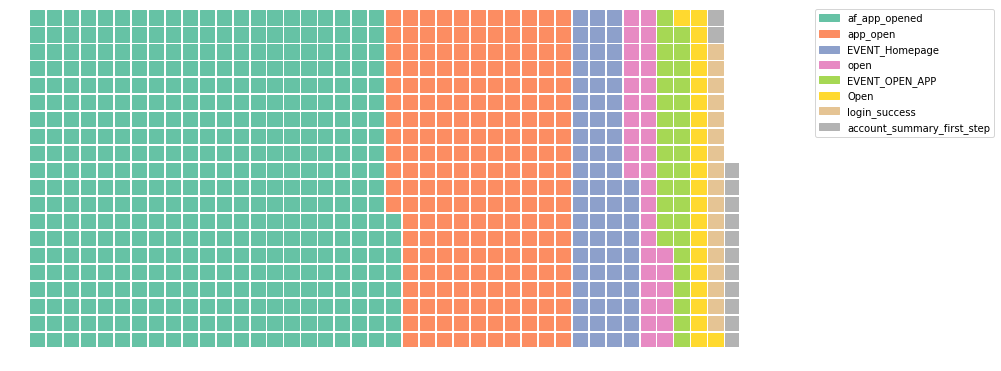

In [12]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    figsize=(14, 8),
    values=kinds.kind_count,
    labels=list(kinds.index),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1.02)}
)